In [1]:
import subprocess as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# D103

In [13]:
shared_cmd="grep '      2 I' data/dedup_cross-year_sequence_pools/D103-2016-D103-2021_dedup_pool_vdj-nt_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [14]:
unshared_cmd="grep '      1 I' data/dedup_cross-year_sequence_pools/D103-2016-D103-2021_dedup_pool_vdj-nt_with-counts.txt"


p = sp.Popen(unshared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

unshared=stdout.split('\n')[:-1]
unshared=[us[8:] for us in unshared]

In [15]:
D103_2016_total=6602140
D103_2021_total=2794506
D103_shared=len(shared)


In [16]:
(D103_2016_total-D103_shared)

6586823

In [17]:
(D103_2021_total-D103_shared)

2779189

In [30]:
(D103_shared/(D103_2016_total))*100

0.2320005331604601

# 327059

In [23]:
shared_cmd="grep '      2 I' data/dedup_cross-year_sequence_pools/327059-2016-327059-2020_dedup_pool_vdj-nt_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [24]:
unshared_cmd="grep '      1 I' data/dedup_cross-year_sequence_pools/327059-2016-327059-2020_dedup_pool_vdj-nt_with-counts.txt"


p = sp.Popen(unshared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

unshared=stdout.split('\n')[:-1]
unshared=[us[8:] for us in unshared]

In [25]:
D327059_2016_total=18893343
D327059_2020_total=8270945
D327059_shared=len(shared)


In [26]:
(D327059_2016_total-D327059_shared)

18809267

In [27]:
(D327059_2020_total-D327059_shared)

8186869

In [28]:
D327059_shared

84076

In [29]:
(D327059_shared/(D327059_2016_total))*100

0.44500330089809936

# Turnover rate

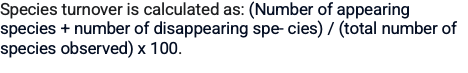

In [31]:
#D103 turnover rate
num_appearing=D103_2021_total-D103_shared
num_disappearing=+D103_2016_total-D103_shared
total_number_obs=D103_2021_total+D103_2016_total

D103_turnover_rate=((num_appearing+num_disappearing)/total_number_obs)*100

In [32]:
D103_turnover_rate

99.67399005985753

In [33]:
#D327059 turnover rate
num_appearing=D327059_2020_total-D327059_shared
num_disappearing=+D327059_2016_total-D327059_shared
total_number_obs=D327059_2020_total+D327059_2016_total

D327059_turnover_rate=((num_appearing+num_disappearing)/total_number_obs)*100

In [34]:
D327059_turnover_rate

99.3809813826153

In [42]:
data=[{'Donor': 'D103', 'turnover rate': D103_turnover_rate, 'type': 'sequence'}, 
      {'Donor': 'D327059', 'turnover rate': D327059_turnover_rate, 'type': 'sequence'},
      {'Donor': 'D103', 'turnover rate': 98.5, 'type': 'clonotype'}, 
      {'Donor': 'D327059', 'turnover rate': 97.4, 'type': 'clonotype'}]

In [43]:
df=pd.DataFrame(data)

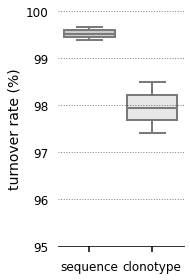

In [53]:
plt.figure(figsize=(2.75,4))
ax=sns.boxplot(data=df, x='type', y='turnover rate',fliersize=0, saturation=1.,
            palette=['0.8', '0.9'],
            hue_order=['All', 'IgM (<2 mutations)', 'IgM (2+ mutations)', 'IgG'],
            linewidth=2)
# sns.stripplot(data=df, x='type', y='turnover rate', ax=ax, palette=['0.25', '0.25', '0.25', '0.25'], alpha=0.5)
ax.set_ylim(95,100)
for y in np.arange(93, 101, 1):
    ls = ':'
    lw = 1
    alpha=0.5
    plt.axhline(y=y, xmin=0, xmax=10, linewidth=lw, color='k', linestyle=ls, alpha=alpha)
    
ax.set_ylabel('turnover rate (%)', fontsize=14)
ax.set_xlabel('', fontsize=14)
# axis tick appearance
ax.tick_params(axis='x', labelsize=12, direction='out', width=1.5, length=6, pad=8, top=False)
ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=4, right=False, left=False)
# remove top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('../make_figures/figures/turnover_rate.pdf', dpi=300)
plt.show()

In [40]:
import numpy as np

In [54]:
D103_turnover_rate

99.67399005985753

In [55]:
D327059_turnover_rate

99.3809813826153

In [56]:
(D103_turnover_rate+D327059_turnover_rate)/2

99.52748572123642